# Homework 2
## BIOST 558 Spring 2020 
### Juan Solorio

In [1]:
# needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline
plt.style.use('ggplot')

### Exercise 1
#### Gradient Descent - Theory (part 1 answers)


We have the objective equation

\begin{equation}
F(\beta) = \frac{1}n\sum_{i=1}^n(y_i - x^T_i\beta)^2 + \lambda\|\beta\|^2_2
\end{equation}

or expanded:

\begin{equation}
F(\beta) = \frac{1}n\sum_{i=1}^n(y_i - \sum_{j=1}^dx_{ij}\beta_j)^2 + \lambda\sum_{j=1}^d\beta_j^2
\end{equation}

which we want to minimize with respect to $\beta$, meaning we want to take the derivative of $F(\beta)$ and set it equal to zero. 

The derivative for n=1 and d=1 yields:
\begin{equation}
\frac{dF}{d\beta} = \frac{2}n(y - x\beta) + 2\lambda\beta
\end{equation}

In Matrix terms, $F(\beta)$ can be interpreted as:
\begin{equation}
F(\beta) = (Y - X\beta)^T(Y-X\beta) + \lambda\beta^T\beta
\end{equation}
\begin{equation}
= y^Ty - \beta^TX^Ty-y^TX\beta+\beta^TX^TX\beta+\lambda\beta^T\beta
\end{equation}
\begin{equation}
= y^Ty - \beta^TX^Ty-y^TX\beta+\beta^TX^TX\beta+\beta^T\lambda I\beta
\end{equation}
\begin{equation}
= y^Ty - 2\beta^TX^Ty + \beta^T(X^TX + \lambda I)\beta
\end{equation}


Taking the derivative of the matrix form of $F(\beta)$ leads us to the following
\end{equation}
\begin{equation}
\frac{d}{d\beta}= - 2X^Ty + 2(X^TX + \lambda I)\beta
\end{equation}




#### Gradient Descent - Algorithm Code

In [2]:
# Load the data
hitters = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv',
                      sep=',', header=0)
hitters = hitters.dropna()

In [3]:
# Creating matrix X with the predictors and 
# and vector y with the response 
X = hitters.drop('Salary', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = hitters.Salary

In [4]:
# Dividing the data into train and test sets.
# By default,  it is a 75-25 split between train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = np.array((X_train-X_train.mean())/(X_train.max()-X_train.min()))
y_train = np.array((y_train-y_train.mean())/(y_train.max()-y_train.min()))

In [5]:
def betas(X,y,lamda=0.05):
    '''
    Function to calculate betas from the matrix solution
    '''
    I = np.identity(len(X[0]))
    return np.dot(np.linalg.inv(np.dot(X.T,X) + lamda*I),np.dot(X.T,y))

In [65]:
def Fx_ridge(X,y,beta, lamda):
    '''
    # RSS = (y-XB).T(y-XB)+lamda*B.T*B
    This is the objective function for Ridge regression
    '''
    n = len(y)
    lin = y - (X @ beta)
    reg = lamda*(beta.T @ beta)
    return (1/n *(lin.T @ lin) + reg)

In [28]:
def computegrad(X, y, beta,lamda):
    '''
    Function for the gradient of the ridge objective function
    '''
    n = len(X[1])
    I = np.identity(len(X_train[1]))
    lin = (X_train.T @ y_train)/n
    reg = ((X_train.T @ X_train)/n + lamda*I) @ beta
    return 2*(reg-lin)

In [223]:
def graddescent(X,y,t,beta,lamda,max_iter=1000):
    '''
    Gradient descent function that takes in X,y,t,beta,lamda,max_iter
    returns list of betas, grandient, objective fx values
    '''
    grad = computegrad(X,y,beta,lamda)
    fx = Fx_ridge(X,y,beta,lamda)
    fx_vals = [fx]
    beta_vals = [beta]
    grad_vals = [np.linalg.norm(grad)]
    for i in range(max_iter):
        beta = beta - t*grad
        grad = computegrad(X,y,beta,lamda)
        fx = Fx_ridge(X,y,beta,lamda)
        beta_vals.append(beta)
        grad_vals.append(np.linalg.norm(grad))
        fx_vals.append(fx)
    return [beta_vals,grad_vals,fx_vals]
    

In [182]:
def graddescent_eps(X,y,t,beta,lamda,eps,max_iter=1000):
    '''
    Gradient descent function that takes in X,y,t,beta,lamda,max_iter
    returns list of betas, grandient, objective fx values
    '''
    grad = computegrad(X,y,beta,lamda)
    fx = Fx_ridge(X,y,beta,lamda)
    fx_vals = [fx]
    beta_vals = [beta]
    grad_vals = [grad]
    iter_val = 0
    while np.linalg.norm(grad) > eps and iter_val < max_iter:
        beta = beta - t*grad
        grad = computegrad(X,y,beta,lamda)
        fx = Fx_ridge(X,y,beta,lamda)
        beta_vals.append(beta)
        grad_vals.append(grad)
        fx_vals.append(fx)
    return [beta_vals,grad_vals,fx_vals]
    

##### Checking the Gradient Descent and Objective Ridge Fx for $\lambda = -5.00$

/home/juansolo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/home/juansolo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in matmul
  """
/home/juansolo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in matmul
  
/home/juansolo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


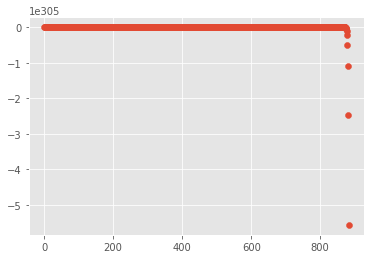

In [196]:
n=len(X_train[1])
beta = np.zeros(n)
t=0.05
lamda=-5

grad_desc_n5 = graddescent(X_train, y_train,t,beta,lamda)
# df_fx = pd.DataFrame(grad_desc_n5[2])
# df_grad = pd.DataFrame(grad_desc_n5[1])
# df_fx.plot(legend=False,figsize=(8,6),title='Ridge Objective Fx')
# plt.xlabel("t")
ts = np.array(range(len(grad_desc_n5[1])))
plt.scatter(x=ts,y=np.array(grad_desc_n5[2]))
plt.show()

From the figure we can observe that with $\lambda < 0$, the Ridge objective function diverges to $-\infty$, which was to be expected given that it would cause the gradient descent to become more of a gradient 'ascent'.

##### Checking the Gradient Descent and Objective Ridge Fx for $\lambda = 0.05$

In [224]:
n=len(X_train[1])
beta = np.zeros(n)
t=0.05
lamda=0.05

grad_desc_05 = graddescent(X_train, y_train,t,beta,lamda)

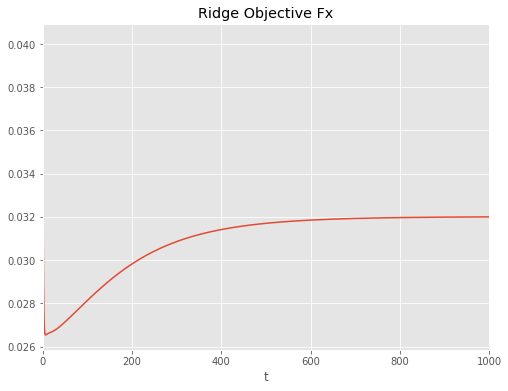

In [225]:
df_fx = pd.DataFrame(grad_desc_05[2])
df_grad = pd.DataFrame(grad_desc_05[1])
df_beta = pd.DataFrame(grad_desc_05[0])
df_fx.plot(legend=False,figsize=(8,6),title='Ridge Objective Fx')
plt.xlabel("t")
plt.show()

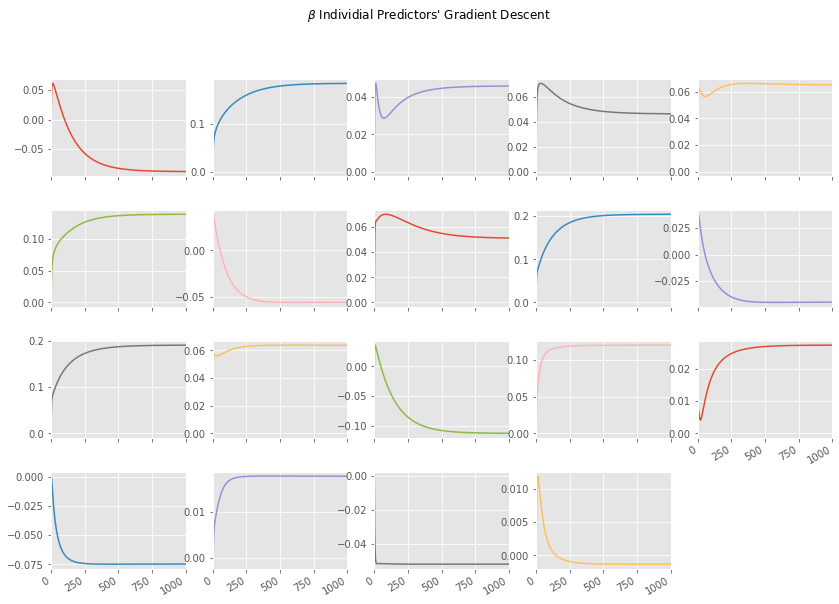

In [230]:
df_beta.plot(subplots=True,layout=(4,5),legend=False,figsize=(14,10), title=r"$\beta$ Individial Predictors' Gradient Descent")
plt.subplots_adjust(hspace=0.35)
plt.show()

As can be observed in the $"Ridge\ Objective\ Fx"$ chart and the $"\beta\ Individial\ Predictors'\ Gradient\ Descent"$ charts, for the $\lambda = 0.05$, we can see each of these values converging, in the case of the $\beta s$ converge to some number and for the $F(\beta)$ to about 0.032.

#### Comparing sklearn.linear_model.Ridge $\beta$ to those values from the defined functions

In [20]:
# sklearn Ridge regression betas
ridge = linear_model.Ridge(alpha=0.05)
model = ridge.fit(X_train,y_train)
model.coef_

array([-0.49423255,  0.61521257,  0.14279993, -0.12541456,  0.0084655 ,
        0.31010389, -0.08027074, -0.36881245,  0.56366317, -0.05996115,
        0.52130315,  0.05585199, -0.4589716 ,  0.14773404,  0.06993996,
       -0.08699545,  0.01999316, -0.0504822 , -0.00686063])

In [115]:
# betas calculated through my betas function
B = betas(X_train,y_train)
B

array([-0.49423255,  0.61521257,  0.14279993, -0.12541456,  0.0084655 ,
        0.31010389, -0.08027074, -0.36881245,  0.56366317, -0.05996115,
        0.52130315,  0.05585199, -0.4589716 ,  0.14773404,  0.06993996,
       -0.08699545,  0.01999316, -0.0504822 , -0.00686063])

In [211]:
print("sklearn: %f \t Vectorize Ridge: %f \t Grad Desc: %f"%(
    Fx_ridge(X_train,y_train,model.coef_,lamda),Fx_ridge(X_train,y_train,B,lamda),np.array(grad_desc_05[2])[-1]))

sklearn: 0.107533 	 Vectorize Ridge: 0.107533 	 Grad Desc: 0.031999


The values calculated by the vectorize Ridge function are quite close to those from the sklearn Ridge function.
However the values calculated by my gradient descent were lower than these two previous values.

#### Adding a stopping criteria $\|\nabla F(\beta)\| <$ $\epsilon = 0.005$ 

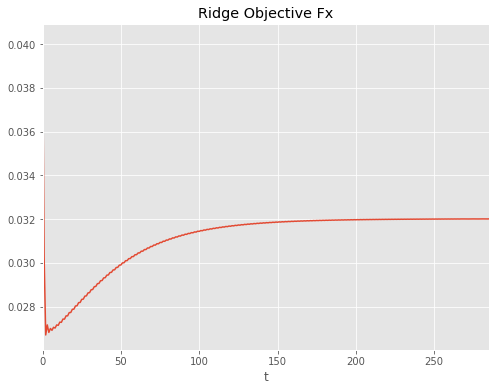

In [231]:
n=len(X_train[1])
beta = np.zeros(n)
t=0.2
lamda=0.05
eps = 0.005
grad_desc_eps = graddescent_eps(X_train, y_train,t,beta,lamda,eps)

df_fx = pd.DataFrame(grad_desc_eps[2])
df_grad = pd.DataFrame(grad_desc_eps[1])
df_fx.plot(legend=False,figsize=(8,6),title='Ridge Objective Fx')
plt.xlabel("t")
plt.show()

The new criteria allows for the gradient descent process to stop sooner as it converges without the need to continue iterating.

### Exercise 2

In [31]:
# (a) Read in the dataset. The data can be downloaded from this url: http://www-bcf.usc.
# edu/~gareth/ISL/Auto.csv When reading in the data use the option na values=’?’.
# Then drop all NaN values using dropna().

# Load the data
Auto = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Auto.csv",
                      sep=',', header=0, na_values='?')
Auto = Auto.dropna()
Auto['constant']=1

In [32]:
# (b) Use the OLS function from the statsmodels package to perform a simple linear regression with mpg as the response and weight as the predictor. Be sure to include an
# intercept. Use the summary() attribute to print the results.

X = Auto.loc[:,['constant','weight']]
Y = Auto.mpg
lm_mpg_wgt = sm.OLS(Y,X)

lm_mpg_wgt_model = lm_mpg_wgt.fit()
print(lm_mpg_wgt_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          6.02e-102
Time:                        17:11:31   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      46.2165      0.799     57.867      0.0

- i) From the summary statistics we can observe there is a strong relation between Weight and mpg. 

- ii) From the summary we see that the p-value suggest a very strong statistical significance for the linear relation between MPG and Weight. With a correlation of -0.83

- iii) The relationship between MPG and Weight is negative.

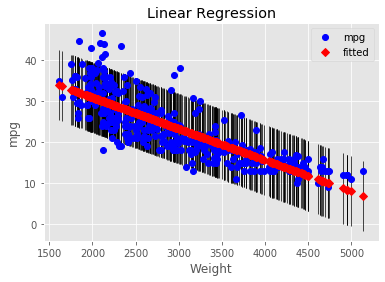

In [33]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(lm_mpg_wgt_model, 1, ax=ax)
ax.set_xlabel("Weight")
ax.set_ylabel("mpg")
ax.set_title("Linear Regression")
plt.show()

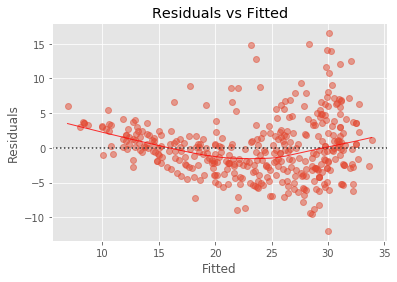

In [34]:
# (d) Plot the residuals vs. fitted values. Comment on any problems you see with the fit.
fig, ax = plt.subplots()
lm_mpg_wgt_fitted = lm_mpg_wgt_model.fittedvalues
lm_mpg_wgt_res = lm_mpg_wgt_model.resid
fig = sns.residplot(lm_mpg_wgt_fitted,Auto.columns[0],data=Auto,
             lowess=True,
             scatter_kws={'alpha':0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_xlabel("Fitted")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted")
plt.show()

The red lines across the data shows a "bow-shape" or curve which indicates we are not capturing some of the non-linear aspects of the model.

### Exercise 3

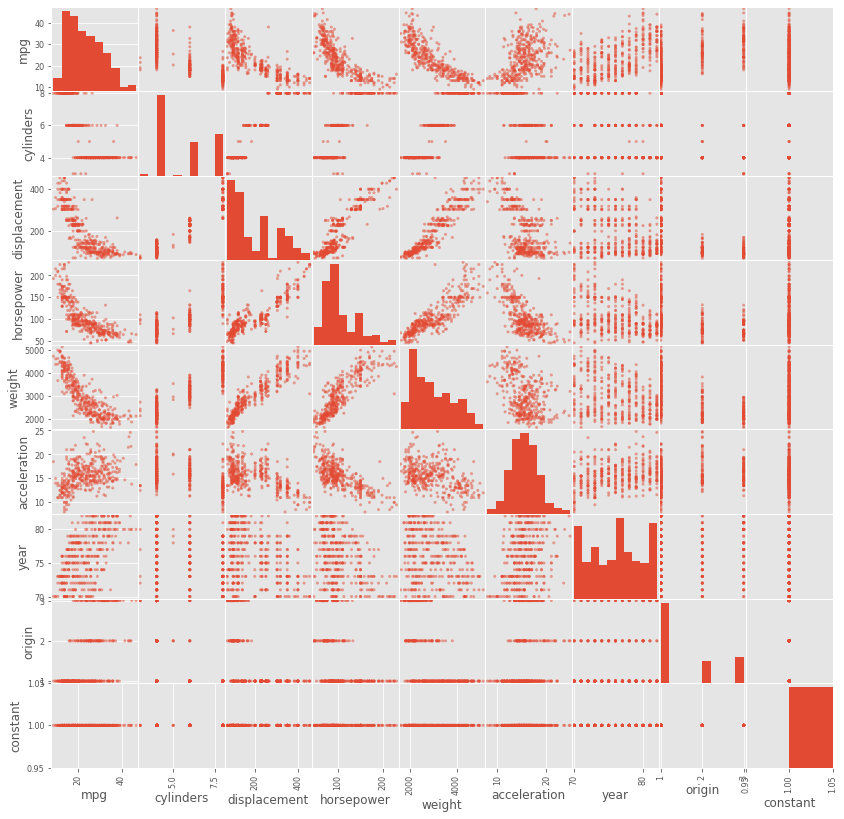

In [36]:
# (a) Produce a scatterplot matrix which includes all of the variables in the data set using
# pandas.plotting.scatter matrix
pd.plotting.scatter_matrix(Auto, alpha=0.5, figsize=(14,14))
plt.show()

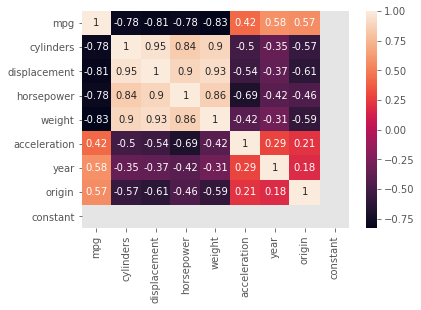

In [40]:
# (b) Compute the matrix of correlations between the variables using the corr() attribute
# in Pandas.

corrMatrix = Auto.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [41]:
# (c) Use the OLS function from the statsmodels package to perform a multiple linear
# regression with mpg as the response and all other variables except name as the predictors.
# Be sure to include an intercept.
Xmlt = Auto.loc[:,['constant','cylinders','displacement','horsepower','weight','acceleration','year','origin']]
lm_mpg_mlt = sm.OLS(Y,Xmlt)

lm_mpg_mlt_model = lm_mpg_mlt.fit()
print(lm_mpg_mlt_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          2.04e-139
Time:                        17:14:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

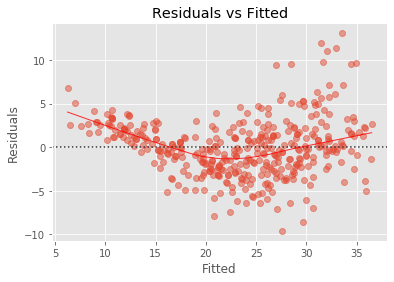

In [42]:
# (d) Plot the residuals vs. fitted values. Comment on any problems you see with the fit.
fig, ax = plt.subplots()
lm_mpg_mlt_fitted = lm_mpg_mlt_model.fittedvalues
lm_mpg_mlt_res = lm_mpg_mlt_model.resid
fig = sns.residplot(lm_mpg_mlt_fitted,Auto.columns[0],data=Auto,
             lowess=True,
             scatter_kws={'alpha':0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_xlabel("Fitted")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted")
plt.show()


Even from the multivariate model, the Residuals vs Fitted plot is still showing some aspects of the model that are not accounted for. This might mean we could be overlooking some sort of transformation to possibly allow for a better fit.

In [43]:
# (e) Statsmodels allows you to fit models using R-style formulas. See http://www.statsmodels.
# org/dev/example_formulas.html. Use the * and : symbols to fit linear regression
# models with interaction effects. Do any interactions appear to be statistically significant?

import statsmodels.formula.api as smf
Auto_x = Auto.drop(['name','constant'],axis=1)
lm_mpg_mult = smf.ols(formula = 'mpg ~ cylinders * displacement * horsepower * weight * acceleration * year * origin', data=Auto_x)
res_mult = lm_mpg_mult.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     38.51
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          1.49e-123
Time:                        17:16:11   Log-Likelihood:                -838.23
No. Observations:                 392   AIC:                             1880.
Df Residuals:                     290   BIC:                             2286.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [44]:
# (f) Try a few different transformations of the variables, such as log(X), 1/X,
# sqrt(X), X2. Comment on your findings.
Auto_log = np.log(Auto_x.drop(['year','origin'],axis=1))
Auto_inv = 1/Auto_x.drop(['year','origin'],axis=1)
Auto_sqrt= np.sqrt(Auto_x.drop(['year','origin'],axis=1))


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     67.67
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          1.92e-130
Time:                        17:16:18   Log-Likelihood:                 243.63
No. Observations:                 392   AIC:                            -423.3
Df Residuals:                     360   BIC:                            -296.2
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

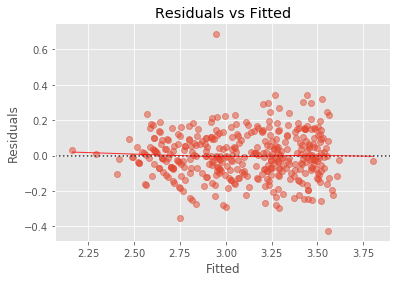

In [45]:
lm_log = smf.ols(formula = 'mpg ~ cylinders * displacement * horsepower * weight * acceleration', data=Auto_log)
lm_log_model = lm_log.fit()
print(lm_log_model.summary())

fig, ax = plt.subplots()
lm_log_fitted = lm_log_model.fittedvalues
lm_log_res = lm_log_model.resid
fig = sns.residplot(lm_log_fitted,Auto_log.columns[0], data=Auto_log,
             lowess=True,
             scatter_kws={'alpha':0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_xlabel("Fitted")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted")
plt.show()

By conducting a Log transformation on the data, we can see that the residuals now present a much better fit for the Fitted values. We even see from the $p-values$ that each predictor and the interactions show statistical significance in their relation to mpg.